In [11]:
import numpy as np
import matplotlib.pyplot as pit
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression as LR
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

In [18]:
# breast_cancerデータ確認(dict-keys)
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [16]:
# 説明変数 30種類
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [19]:
len(data.data)

569

In [20]:
data.target[:50]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1])

In [21]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [22]:
#診療の内訳
malignant_count = len(np.where(data.target == 0)[0]) 
benign_count = len(np.where(data.target == 1)[0])
print('0:悪性', malignant_count)
print('1:良性', benign_count)

0:悪性 212
1:良性 357


In [15]:
dataX = pd.DataFrame(data=data.data,columns=data.feature_names)
dataX["label"] = data.target
dataX.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [23]:
# Cancerデータを訓練データとテストデータ(20%)に分割
X_train, X_test, Y_train, Y_test = train_test_split(data.data, data.target, test_size = 0.2, random_state = 1234)

In [24]:
# 分割後のデータ件数
print('train:',len(X_train))
print('test:', len(Y_test))

train: 455
test: 114


In [25]:
clf = LR()
clf.fit(X_train, Y_train)#学習精度

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [37]:
predict = clf.predict(X_test)#テストデータで予測
clf.score(X_test, Y_test)#テストデータの精度

0.9473684210526315

Text(0.5,1,'sigmoid function')

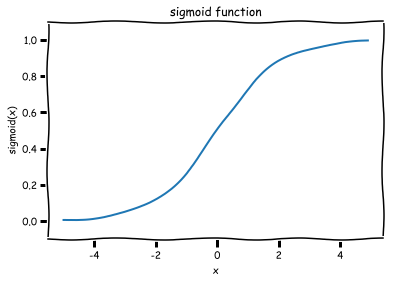

In [38]:
# シグモイド関数定義
def sigmoid(x):
    return 1 / (1 + np.exp(-x)) # 0〜1.0

# シグモイド関数プロット
pit.xkcd()
%matplotlib inline
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
pit.plot(x,y)
pit.ylim(-0.1, 1.1)
pit.xlabel('x')
pit.ylabel('sigmoid(x)')
pit.title('sigmoid function')

In [39]:
# 決定関数値（絶対値が大きいほど識別境界から離れている）
X_test_value = clf.decision_function(X_test)
# 決定関数値をシグモイド関数で確立に変換
X_test_prob = sigmoid(X_test_value)

In [41]:
# テストデータの予測結果(Pandasにデータを格納して確認）
pd.set_option("display.max_rows",114)
data_test_df = pd.DataFrame(Y_test, columns = ['正解値'])
data_test_df['予測値'] =  pd.Series(predict)
data_test_df['正誤'] =  pd.Series(Y_test == predict)
data_test_df['決定関数値'] =  pd.Series(X_test_value)
data_test_df['確率(良性)'] =  pd.Series(X_test_prob).round(4)
data_test_df

,正解値,予測値,正誤,決定関数値,確率(良性)
0,1,1,True,2.618486,0.9320
1,1,1,True,9.157412,0.9999
2,1,1,True,2.794249,0.9424
3,1,1,True,4.752783,0.9914
4,1,1,True,5.729277,0.9968
5,1,1,True,5.294502,0.9950
6,0,0,True,-2.649497,0.0660
7,1,1,True,6.275097,0.9981
8,0,0,True,-20.926064,0.0000
9,0,0,True,-12.227112,0.0000


In [ ]:
#ガン診断データを使ったロジスティック回帰分析は以上